<a href="https://colab.research.google.com/github/ebceran/Global-Sector-Profitability-Analysis-2015-2025-/blob/main/data_sector_profitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

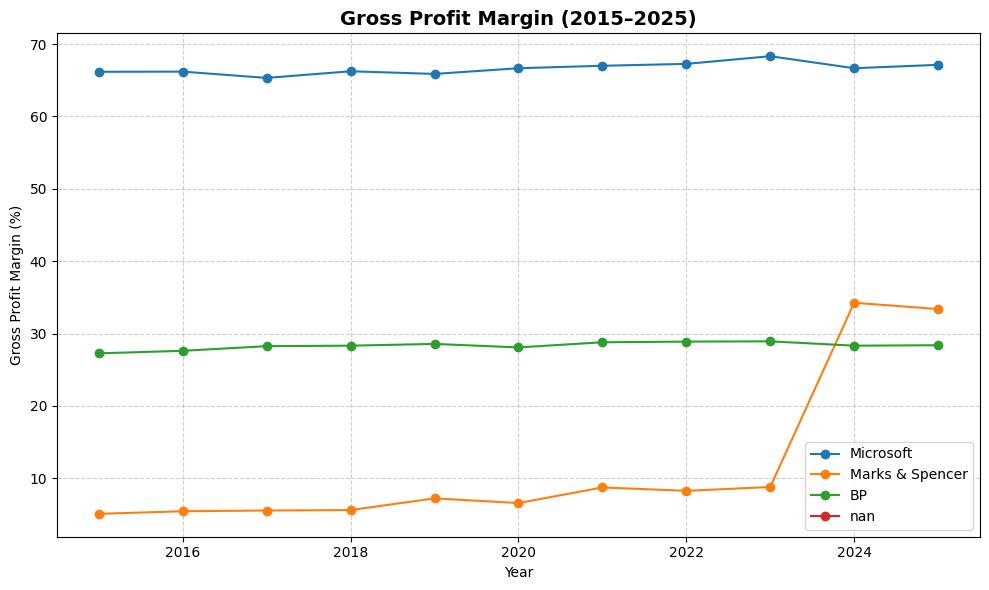

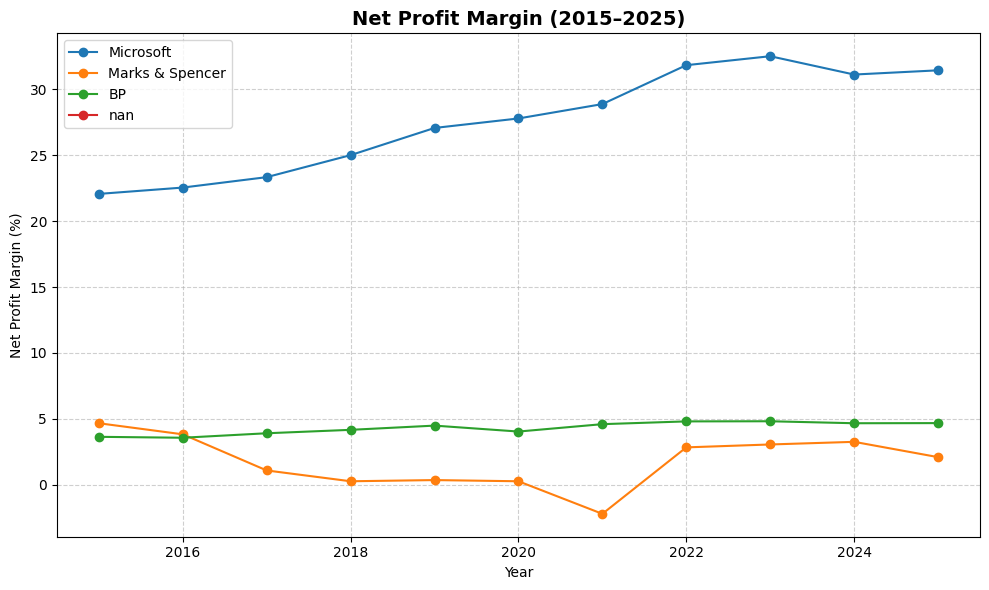

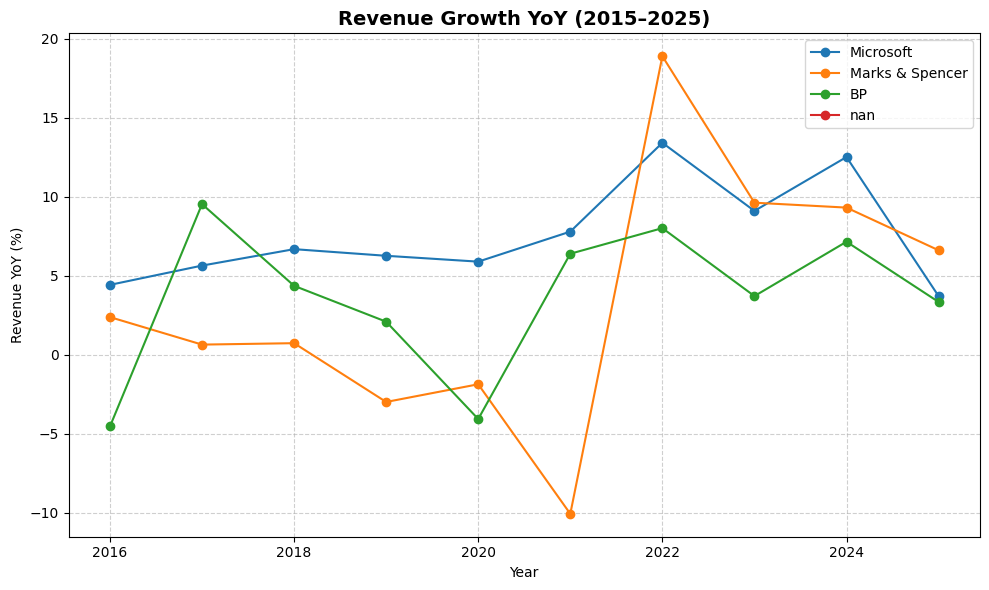

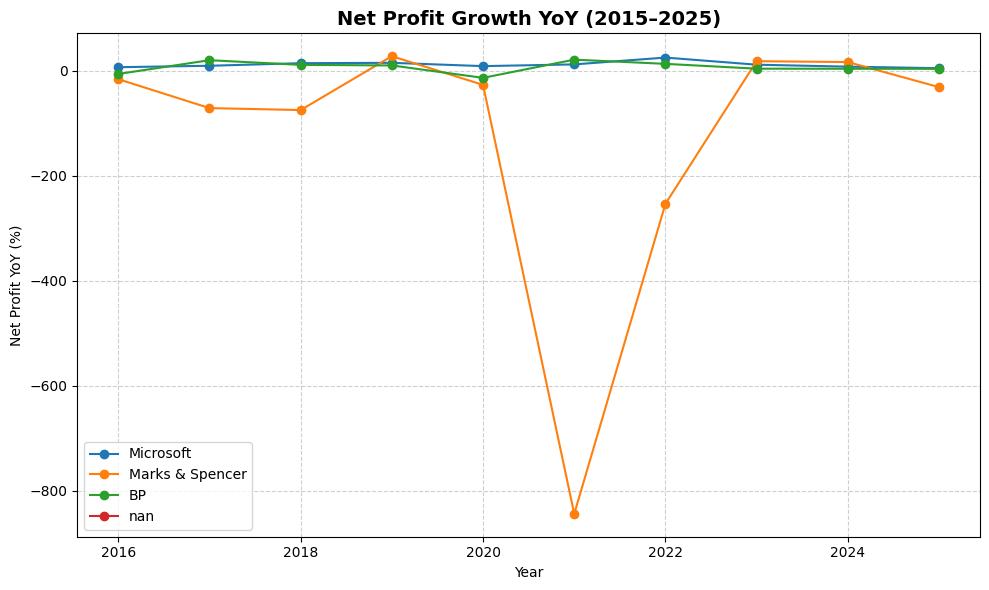

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 0) Prepare the folder
os.makedirs("figures", exist_ok=True)

# 1) Prepare Data
df = pd.read_csv("/datasector_profitability.csv")

# 2) Convert years and percentages to numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
for col in ["GPM (%)","NPM (%)","Revenue YoY (%)","Net Profit YoY (%)"]:
    df[col] = (df[col].astype(str)
                      .str.replace("%","", regex=False)
                      .str.strip())
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 3) Company List
companies = df["Company"].unique()

# 4) Common drawing function
def plot_metric(metric, ylabel, title, filename):
    plt.figure(figsize=(10,6))
    for company in companies:
        s = df[df["Company"] == company].sort_values("Year")
        plt.plot(s["Year"], s[metric], marker="o", label=company)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Year"); plt.ylabel(ylabel)
    plt.legend(); plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"figures/{filename}", dpi=300)
    plt.show()

# 5) Create Graphs
plot_metric("GPM (%)", "Gross Profit Margin (%)", "Gross Profit Margin (2015–2025)", "gpm.png")
plot_metric("NPM (%)", "Net Profit Margin (%)", "Net Profit Margin (2015–2025)", "npm.png")
plot_metric("Revenue YoY (%)", "Revenue YoY (%)", "Revenue Growth YoY (2015–2025)", "revenue_yoy.png")
plot_metric("Net Profit YoY (%)", "Net Profit YoY (%)", "Net Profit Growth YoY (2015–2025)", "netprofit_yoy.png")

